# Chapter 9. 상관계수 (Correlation Coefficient)

상관계수는 Hedge Fund 들의 long/short strategy 에 많이 이용한다.

상관계수는 두개의 변수가 linear 한 정도를 측정하는 것이다. 두 변수는 price 와 price 가 될 수도 있고, price 와 강우량이 될 수도 있다. 어떤 조합도 가능하다. 그 값은 언제나 -1 과 1 사이이다. 양의 계수는 두개의 변수가 직접 연결된 것을 나타낸다. 즉, 하나가 증가하면 다른 하나도 증가한다. 음의 계수는 두개의 변수가 역으로 관련된 것을 나타낸다. 하나가 증가하면 다른 하나는 감소한다. 상관계수가 0 에 가까워질수록 두 변수간의 관계는 약화된다. 
correlation 을 이해 하려면 covariance 를 알아야 한다. covariance 는 한 변수의 variance 가 얼마나 많이 다른 변수의 variance 로 설명되는지를 측정한 것이다. 즉, Y 가 변할 때마다, X 가 얼마나 변하는지 check 하여 따라서 변화하는 정도가 크면 high covariance 를 갖는다고 말한다. 

두 수열 $X$ 와 $Y$ 가 다음과 같이 정의되면,
$$r = \frac{Cov(X,Y)}{std(X)std(Y)}$$
(여기서 $Cov$ 는 covariance 이고 $std$ 는 표준편차)

두개의 random data set 은 0 에 가까운 correlation 을 갖는다.

## Correlation 과 Covariance

Correlation 은 단순히 정규화된 형태의 covariance 이다. 정규화하지 않으면 correlation 과 covariance 는 일상 대화에서 거의 비슷한 의미로 사용된다. 두개는 개념적으로는 거의 동일하다. 

### Covariance 자체로는 큰 의미가 없다.

두개의 random 변수 $X$ 와 $Y$ 의 covariance 를 다음과 같이 취해보자.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X = np.random.rand(50)
Y = 2 * X + np.random.normal(0, 0.1, 50)

np.cov(X, Y)[0, 1]

0.15228386219059137

예를 들어 Apple 과 어떤 다른 회사의 covariance 가 0.19 라고 하면, 그 자체로는 아무런 의미가 없으나 두 주식의 variance 로 normalize 를 하여 -1 과 1 사이의 값을 가진 correlation 을 구하면 의미가 생긴다.

이 말의 의미를 이해하기 위해 다음 식을 보자.

$$\frac{Cov(X, Y)}{std(X)std(Y)}$$

$$= \frac{Cov(X, Y)}{\sqrt{var(X)}\sqrt{var(Y)}}$$

$$= \frac{Cov(X, Y)}{\sqrt{Cov(X, X)}\sqrt{Cov(Y, Y)}}$$

두 수열의 covariance 와 correlation 을 예로 들어 보자. X 는 random 숫자이고, Y 는 noise 없이 완전히 X 에 종속되는 숫자이다.

In [4]:
X = np.random.rand(50)
Y = 2 * X + 4

print('Covariance of X and Y: \n' + str(np.cov(X, Y)))
print('Correlation of X and Y: \n' + str(np.corrcoef(X, Y)))

Covariance of X and Y: 
[[ 0.10452432  0.20904864]
 [ 0.20904864  0.41809727]]
Correlation of X and Y: 
[[ 1.  1.]
 [ 1.  1.]]


### `np.cov` 와 `np.corrcoef` 가 matrix 를 return 하는 이유

통계학에서 covariance matrix 는 중요한 개념이다. 우리는 일반적으로 두개의 변수 $X$ 와 $Y$ 의 공분산(covariance) 를 이야기 하는데, 이 것은 $X$ 와 $Y$ matrix 에서 한개의 값에 해당한다. 각 변수에 대해 한개의 row 와 column 을 가지진다. 

Often people will refer to the covariance of two variables $X$ and $Y$, but in reality that is just one entry in the covariance matrix of $X$ and $Y$. For each input variable we have one row and one column.

대각선은 단순히 variable 자체의 variance - $Cov(X, X)$ - 이고, 대각선 바깥은 두 변수간의 covariance 이다. matrix 는 대각선을 따라 대칭적이다.

numpy.corrcoef(x, y) - return Pearson product-moment correlation coefficients.

In [6]:
cov_matrix = np.cov(X, Y)
print(cov_matrix)
print()
# np.var 의 default ddof = 0 이므로 delta dof = 1 로 준다. (Element 갯수 - delta dof ) 가 자유도가 된다.
# 이것은 np.cov 의 default 가 1 이므로 약간의 차이가 날 수 있기 때문이다.
error1 = cov_matrix[0, 0] - X.var(ddof=1)
error2 = cov_matrix[1, 1] - Y.var(ddof=1)

print('error1: ' + str(error1))     # covariance matrix 의 [0, 0] 가 X 의 variance 임을 확인 하였다.
print('error2: ' + str(error2))     # covariance matrix 의 [1, 1] 이 Y 의 variance 임을 확인 하였다.

[[ 0.10452432  0.20904864]
 [ 0.20904864  0.41809727]]

error1: -2.77555756156e-17
error2: -1.66533453694e-16


완전히 random 한 X 와 Y 를 취해 plot 과 correlation 을 구해보자. 실제로 X, Y 가 correlation 이 있는지 여부는 통계적으로 p-value check 을 해야 하지만 plot 상으로는 상관관계가 발견되지 않는다.

[[ 1.          0.11282752]
 [ 0.11282752  1.        ]]

Correlation: 0.115130124805
Built-in Correlation: 0.112827522309


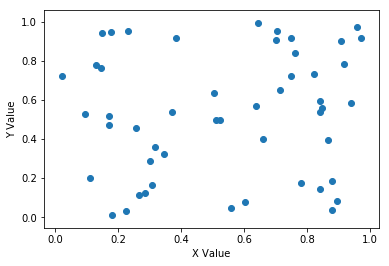

In [14]:
X = np.random.rand(50)
Y = np.random.rand(50)

corr_XY = np.corrcoef(X, Y)
print(corr_XY)
print()

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: ' + str(np.cov(X,Y)[0, 1]/(np.std(X)*np.std(Y))))

print('Built-in Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

이번에는 relation 을 부여한 data set 을 비교해 보자.

Correlation: 0.940413187209


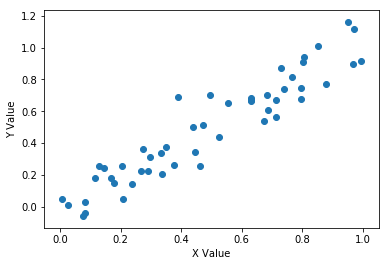

In [15]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)       # 약간의 noise 부여

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

noise 를 좀 더 추가하해 본다.

Correlation: 0.838894259273


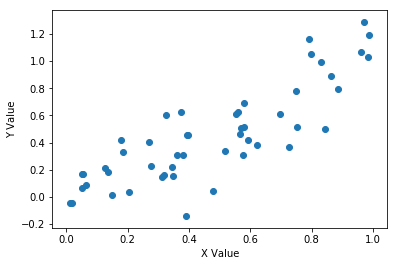

In [16]:
X = np.random.rand(50)
Y = X + np.random.normal(0, .2, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

역의 상관 관계를 만들어 본다.

Correlation: -0.947343108372


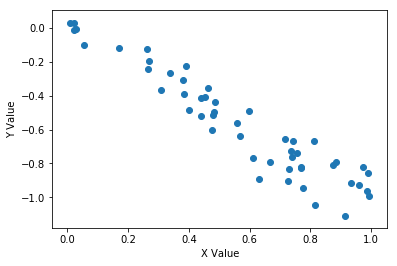

In [17]:
X = np.random.rand(50)
Y = -X + np.random.normal(0, .1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

## Correlation 의 용도

### 관련된 자산들을 파악

주의할 점은 두개의 자산이 correlated 라는 것은 움직임이 비슷하다는 것이지 한 자산의 움직임이 다른 자산의 움직임을 일으킨다는 의미는 아니란 것이다.

In [69]:
from googlefinance.client import get_price_data, get_prices_data
import pandas as pd

start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2011-01-01')     
price = get_price_data({'q': "020560", 'i': "86400", 'x': "KRX", 'p': "10Y" })['Close'].loc[start : end]
price.index = pd.to_datetime(price.index.date)
ASIANA = pd.DataFrame(price.values, columns=['Close'], index=price.index)

price = get_price_data({'q': "005930", 'i': "86400", 'x': "KRX", 'p': "10Y" })['Close'].loc[start : end]
price.index = pd.to_datetime(price.index.date)
SEC = pd.DataFrame(price.values, columns=['Close'], index=price.index)

price = get_price_data({'q': "003490", 'i': "86400", 'x': "KRX", 'p': "10Y" })['Close'].loc[start : end]
price.index = pd.to_datetime(price.index.date)
KAL = pd.DataFrame(price.values, columns=['Close'], index=price.index)

In [70]:
print(KAL.shape)
print(SEC.shape)
print(ASIANA.shape)

(251, 1)
(251, 1)
(251, 1)


In [71]:
np.corrcoef(KAL.T, ASIANA.T)

array([[ 1.        ,  0.82523998],
       [ 0.82523998,  1.        ]])

Correlation coefficients


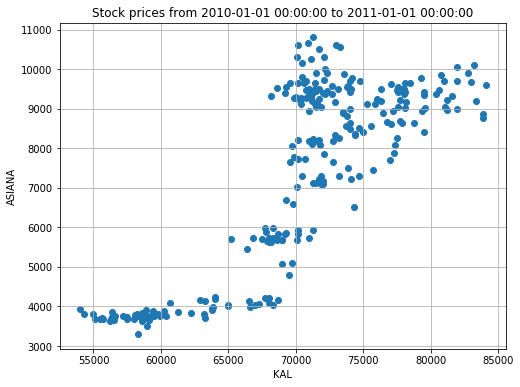

KAL and ASIANA:  0.825239981099


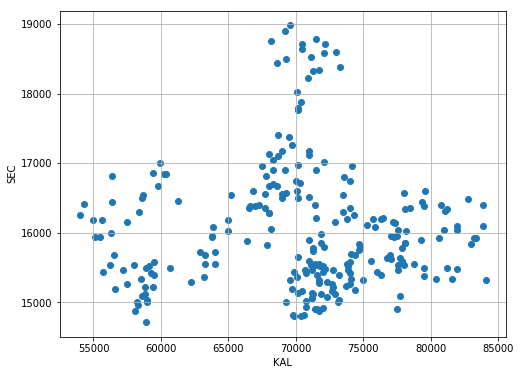

KAL and SEC:  0.00861766967676


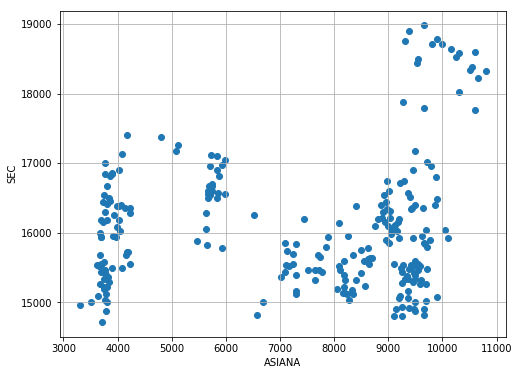

ASIANA and SEC:  0.143187373006


In [72]:
print("Correlation coefficients")

plt.figure(figsize=(8,6))
plt.scatter(KAL, ASIANA)
plt.xlabel('KAL')
plt.ylabel('ASIANA')
plt.title('Stock prices from ' + str(start) + ' to ' + str(end))
plt.grid(True)
plt.show()
print("KAL and ASIANA: ", np.corrcoef(KAL.T, ASIANA.T)[0,1])

plt.figure(figsize=(8,6))
plt.scatter(KAL, SEC)
plt.xlabel('KAL')
plt.ylabel('SEC')
plt.grid(True)
plt.show()
print("KAL and SEC: ", np.corrcoef(KAL.T, SEC.T)[0,1])

plt.figure(figsize=(8,6))
plt.scatter(ASIANA, SEC)
plt.xlabel('ASIANA')
plt.ylabel('SEC')
plt.grid(True)
plt.show()
print("ASIANA and SEC: ", np.corrcoef(ASIANA.T, SEC.T)[0,1])

### 서로 연관성 없는 자산들로 portfolio 구성

finance 에서 correlation 이 유용한 이유는 portfolio 구성에 있다. 연관성 없는 자산들로 portfolio 를 구성하면 안정된 수익을 기대할 수 있다.

# 한계점

## 중요성

변수들이 정규분포 되어 있지 않은 경우 특히 correlation 이 중요한지 말하기 쉽지 않다. 상관계수는 1 에 가까운 경우 측정 기간 동안 두개의 주식이 correlate  되어있다고 말할 수 있지만 미래에도 그럴지 알 수 없다. KOSPI 지수와 correlation 이 높은 주식들은 다른 평균적인 주식 보다 개별 주식간의 correlation 이 좀 더 높을 것이다.
특정 시점에만 correlated 된 것 처럼 보일 수 있으므로 긴 기간에 걸쳐 상관계수를 검사해야 한다.
예를 들어 KAL 과 ASIANA 의 2010-1-1 에서 2011-1-1 까지의 correlation 은 0.82 인데 이 것을 60 일 이동평균으로 측정해 보면 측정 시기에 따라 음의 correlation 혹은 0 correlation 을 가지는 경우도 많다는 것을 알 수 있다. 따라서, 긴 기간 동안 correlation 이 얼마나 stable 한가 측정할 필요가 있다.

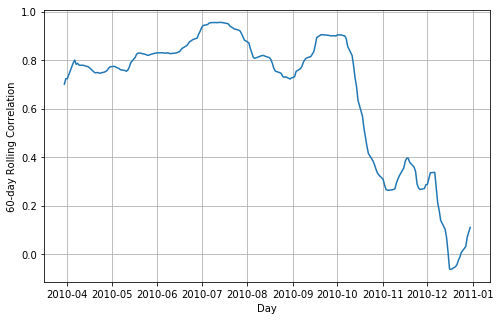

In [75]:
rolling_correlation = KAL.rolling(window=60).corr(other=ASIANA)

plt.figure(figsize=(8,5))
plt.plot(rolling_correlation)
plt.grid(True)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation');

## Non-Linear Relationships

상관계수는 두 변수간 관계의 강도 측정에 유용하다. 하지만 분석에서 놓칠수 있는 다른 예측 가능한 방식으로 관련되었을 수도 있다. 예를 들어 한 변수가 일정 시차를 두고 다른 변수의 움직임을 따라가는 것이다. 이러한 지연 관계를 다루는 기술이 있다. 또다른 예는 한 변수가 다른 변수의 변화율에 관련되었을 수도 있다. 이러한 관계 모두 비선형인데 발견할 수 있으면 매우 유용한 관계이다.

또한, 상관계수는 예외 경우 (outlier) 에 매우 민감할 수 있어서 data 몇개만 제외해도 결과가 다라질 수 있는데, 이러한 data 가 유의미한 정보를 가진 것인지 단순히 noise 인지 판단하기 쉽지 않다.

예로서, 정규분포 대신 노이즈를 가진 포아송 분포를 만들어 살펴 보자.

* 푸아송 분포(Poisson distribution): 단위 시간 안에 어떤 사건이 몇 번 발생할 것인지를 표현하는 이산 확률 분포

0.15212451213643835

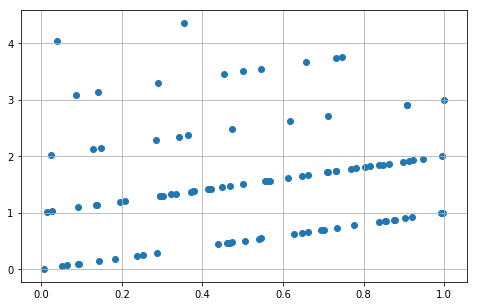

In [76]:
X = np.random.rand(100)
Y = X + np.random.poisson(size=100)

plt.figure(figsize=(8,5))
plt.grid(True)
plt.scatter(X, Y)

np.corrcoef(X, Y)[0, 1]

위에서 보듯이 분명한 pattern 이 보이지만 정규분포를 가정하고 있는 상관계수는 아무 관계가 없는 0.213 으로 나타난다.